# Titanic Dataset Analysis
**Author:** Trent Rueckert  
**Date:** April 4, 2025  
**Objective:** Analyze the Titanic dataset to predict fare based on various input features.

## Introduction
In this notebook, I will analyze the Titanic dataset to predict fare by preparing/exploring the data, cleaning the data/handling missing values, performing feature engineering, and training machine learning models based on different selected features. More specifically, I will be using various regression models to provide insights on which features most impact fare price.

## Imports
Import the necessary libraries with the code below.

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Section 1. Import and Inspect the Data
Load the Titanic dataset and confirm it’s structured correctly.

In [2]:
# Load Titanic dataset from seaborn and verify
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Section 2. Data Exploration and Preparation
Prepare the Titanic data for regression modeling. See the previous work.
* Impute missing values for age using median
* Drop rows with missing fare (or impute if preferred)
* Create numeric variables (e.g., family_size from sibsp + parch + 1)

In [8]:
titanic['age'].fillna(titanic['age'].median(), inplace=True)

titanic = titanic.dropna(subset=['fare'])

titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

titanic.head()

C:\Users\trent\AppData\Local\Temp\ipykernel_8824\711576919.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,2
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1


## Section 3. Feature Selection and Justification
* Define multiple combinations of features to use as inputs to predict fare.
* Use unique names (X1, y1, X2, y2, etc.) so results are visible and can be compared at the same time. 
* Remember the inputs, usually X, are a 2D array. The target is a 1D array. 

Case 1. age only

In [4]:
# Case 1. age
X1 = titanic[['age']]
y1 = titanic['fare']

Case 2. family_size only

In [5]:
# Case 2. family_size
X2 = titanic[['family_size']]
y2 = titanic['fare']

Case 3. age and family_size

In [6]:
# Case 3. age, family_size
X3 = titanic[['age', 'family_size']]
y3 = titanic['fare']

Case 4. pclass only

In [7]:
# Case 4. pclass
X4 = titanic[['pclass']]
y4 = titanic['fare']

### Reflection 3:
1. Why might these features affect a passenger’s fare:
   * There could be different ticket fares based on age, family size, or passenger class (pclass). For some examples: children may have cheaper fares than adults, family size could dictate how many tickets much be purchased which would increase the fare as the family size increased, and first-class tickets are likely more expensive than third-class tickets.
2. List all available features:
   * survived, pclass, sex, age, sibsp, parch, fare, embarked, class, who, adult_male, deck, embark_town, alive, alone, family_size
3. Which other features could improve predictions and why:
   * embark_town because there may be different fare prices based on the original location the passengers boarded from.
   * deck because the deck that the passengers are on could be cheaper/more expensive.
4. How many variables are in your Case 4:
   * 1: pclass
5. Which variable(s) did you choose for Case 4 and why do you feel those could make good inputs: 
   * pclass because I think fare prices would be directly impacted by the passenger's class

## Section 4. Train a Regression Model (Linear Regression)

### 4.1 Split the Data

In [10]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=123)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=123)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=123)

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=123)

### 4.2 Train and Evaluate Linear Regression Models (all 4 cases)

We'll use a more concise approach - create each model and immediately call the fit() method. 

In [11]:
lr_model1 = LinearRegression().fit(X1_train, y1_train)
lr_model2 = LinearRegression().fit(X2_train, y2_train)
lr_model3 = LinearRegression().fit(X3_train, y3_train)
lr_model4 = LinearRegression().fit(X4_train, y4_train)

# Predictions

y_pred_train1 = lr_model1.predict(X1_train)
y_pred_test1 = lr_model1.predict(X1_test)

y_pred_train2 = lr_model2.predict(X2_train)
y_pred_test2 = lr_model2.predict(X2_test)

y_pred_train3 = lr_model3.predict(X3_train)
y_pred_test3 = lr_model3.predict(X3_test)

y_pred_train4 = lr_model4.predict(X4_train)
y_pred_test4 = lr_model4.predict(X4_test)

### 4.3 Report Performance

Case 1. age only

In [14]:
print("Case 1: Training R²:", r2_score(y1_train, y_pred_train1))
print("Case 1: Test R²:", r2_score(y1_test, y_pred_test1))

test_rmse1 = np.sqrt(mean_squared_error(y1_test, y_pred_test1))
print("Case 1: Test RMSE:", test_rmse1)
print("Case 1: Test MAE:", mean_absolute_error(y1_test, y_pred_test1))

Case 1: Training R²: 0.009950688019452314
Case 1: Test R²: 0.0034163395508415295
Case 1: Test RMSE: 37.97164180172938
Case 1: Test MAE: 25.28637293162364


Case 2. family_size only

In [15]:
print("Case 2: Training R²:", r2_score(y2_train, y_pred_train2))
print("Case 2: Test R²:", r2_score(y2_test, y_pred_test2))

test_rmse2 = np.sqrt(mean_squared_error(y2_test, y_pred_test2))
print("Case 2: Test RMSE:", test_rmse2)
print("Case 2: Test MAE:", mean_absolute_error(y2_test, y_pred_test2))

Case 2: Training R²: 0.049915792364760736
Case 2: Test R²: 0.022231186110131973
Case 2: Test RMSE: 37.6114940041967
Case 2: Test MAE: 25.02534815941641


Case 3. age and family_size

In [16]:
print("Case 3: Training R²:", r2_score(y3_train, y_pred_train3))
print("Case 3: Test R²:", r2_score(y3_test, y_pred_test3))

test_rmse3 = np.sqrt(mean_squared_error(y3_test, y_pred_test3))
print("Case 3: Test RMSE:", test_rmse3)
print("Case 3: Test MAE:", mean_absolute_error(y3_test, y_pred_test3))

Case 3: Training R²: 0.07347466201590014
Case 3: Test R²: 0.049784832763073106
Case 3: Test RMSE: 37.0777586646559
Case 3: Test MAE: 24.284935030470688


Case 4. pclass only

In [17]:
print("Case 4: Training R²:", r2_score(y4_train, y_pred_train4))
print("Case 4: Test R²:", r2_score(y4_test, y_pred_test4))

test_rmse4 = np.sqrt(mean_squared_error(y4_test, y_pred_test4))
print("Case 4: Test RMSE:", test_rmse4)
print("Case 4: Test MAE:", mean_absolute_error(y4_test, y_pred_test4))

Case 4: Training R²: 0.3005588037487471
Case 4: Test R²: 0.3016017234169923
Case 4: Test RMSE: 31.7873316928033
Case 4: Test MAE: 20.653703671484056


### Reflection 4

Compare the train vs test results for each.
1. Did Case 1 overfit or underfit? Explain:
   * Underfit because both the test and training r<sup>2</sup> values are very low and the training is not much higher than the test.
2. Did Case 2 overfit or underfit? Explain:
   * Underfit because both the test and training r<sup>2</sup> values are very low, although slightly better than case 1, and the training is not much higher than the test.
3. Did Case 3 overfit or underfit? Explain:
   * Underfit because both the test and training r<sup>2</sup> values are very low, although slightly better than cases 1 and 2, and the training is not much higher than the test.
4. Did Case 4 overfit or underfit? Explain:
   * Still an underfit because of the lower test and training r<sup>2</sup> values, but these were much higher than the first 3 cases.

Adding Age
1. Did adding age improve the model:
   * Yes adding age did seem to improve the model a little for case 3 as the r<sup>2</sup> values increased some, but not a lot. 
2. Propose a possible explanation (consider how age might affect ticket price, and whether the data supports that): 
   * I think since the r<sup>2</sup> values increased when age was added to family_size means that age does have a factor in fare. Which makes sense because the fares likely change for people of different ages like children being cheaper for example.

Worst
1. Which case performed the worst:
   * Case 1
2. How do you know: 
   * Case 1 has the lowest r<sup>2</sup> values, indicating that it explains the least variance in the data among the cases.
3. Do you think adding more training data would improve it (and why/why not):
   * I do not think so because since the r<sup>2</sup> values are so low, it may not be able to pick up on the trends of the current features. 

Best
1. Which case performed the best:
   * Case 4
2. How do you know: 
   * It had the highest r<sup>2</sup> values and lowest RMSE.
3. Do you think adding more training data would improve it (and why/why not): 
   * It might help since it is performing much better than the other cases.

## Section 5. Compare Alternative Models

I will be using Case 4 for the following

### 5.1 Ridge Regression (L2 penalty)
Ridge Regression is a regularized version of linear regression that adds a penalty to large coefficient values. It uses the L2 penalty, which adds the sum of squared coefficients to the loss function.

This "shrinks" the coefficients, reducing the model’s sensitivity to any one feature while still keeping all features in the model.
* Penalty term: L2 = sum of squared weights
* Effect: Shrinks weights, helps reduce overfitting, keeps all features

In [18]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X4_train, y4_train)
y_pred_ridge = ridge_model.predict(X4_test)

### 5.2 Elastic Net (L1 + L2 combined)
Elastic Net combines both L1 (Lasso) and L2 (Ridge) penalties. It balances the feature selection ability of Lasso with the stability of Ridge.

We control the balance with a parameter called l1_ratio:
* If l1_ratio = 0, it behaves like Ridge
* If l1_ratio = 1, it behaves like Lasso
* Values in between mix both types
* Penalty term: α × (L1 + L2)
* Effect: Shrinks weights and can drop some features — flexible and powerful

In [19]:
elastic_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
elastic_model.fit(X4_train, y4_train)
y_pred_elastic = elastic_model.predict(X4_test)

### 5.3 Polynomial Regression
Linear regression is a simple two dimensional relationship - a simple straight line. But we can test more complex relationships. Polynomial regression adds interaction and nonlinear terms to the model. Be careful here - higher-degree polynomials can easily overfit.

In [23]:
# Set up the poly inputs
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X1_train)
X_test_poly = poly.transform(X1_test)

In [24]:
# Use the poly inputs in the LR model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y1_train)
y_pred_poly = poly_model.predict(X_test_poly)

### 5.4 Visualize Polynomial Cubic Fit (for 1 input feature)
Choose a case with just one input feature and plot it. For example:

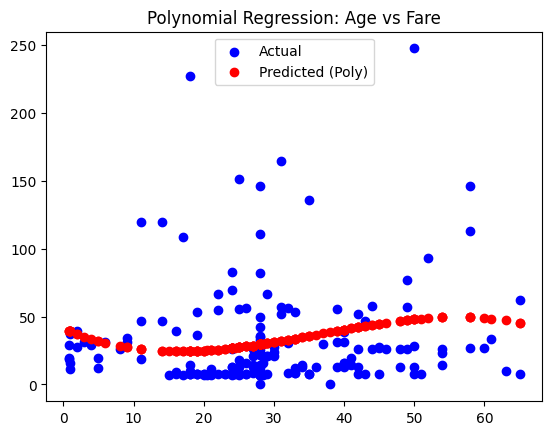

In [25]:
plt.scatter(X1_test, y1_test, color='blue', label='Actual')
plt.scatter(X1_test, y_pred_poly, color='red', label='Predicted (Poly)')
plt.legend()
plt.title("Polynomial Regression: Age vs Fare")
plt.show()

### 5.5 Compare All Models
Create a summary table or printout comparing all models:

In [27]:
def report(name, y_true, y_pred):
    print(f"{name} R²: {r2_score(y_true, y_pred):.3f}")
    
    # Calculate RMSE manually
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{name} RMSE: {rmse:.2f}")
    
    # MAE
    print(f"{name} MAE: {mean_absolute_error(y_true, y_pred):.2f}\n")

# Reporting the metrics for each model
report("Linear (Case 4)", y4_test, y_pred_test4)
report("Ridge (Case 4)", y4_test, y_pred_ridge)
report("ElasticNet (Case 4)", y4_test, y_pred_elastic)
report("Polynomial (Case 4)", y4_test, y_pred_poly)

Linear (Case 4) R²: 0.302
Linear (Case 4) RMSE: 31.79
Linear (Case 4) MAE: 20.65

Ridge (Case 4) R²: 0.302
Ridge (Case 4) RMSE: 31.77
Ridge (Case 4) MAE: 20.64

ElasticNet (Case 4) R²: 0.339
ElasticNet (Case 4) RMSE: 30.92
ElasticNet (Case 4) MAE: 19.93

Polynomial (Case 4) R²: -0.003
Polynomial (Case 4) RMSE: 38.10
Polynomial (Case 4) MAE: 25.30



### Reflection 5.4-5.5
1. What patterns does the cubic model seem to capture:
   * It captures what looks to be a non-linear trend between age and fare.
2. Where does it perform well or poorly:
   * It performs pretty well in the middle ages, but with children and seniors it seems to struggle.
3. Did the polynomial fit outperform linear regression:
   * No it did not. It had a lower r<sup>2</sup> value and a higher RMSE.
4. Where (on the graph or among which kinds of data points) does it fit best:
   * From about age 15-40.

### 5.5 Visualize Higher Order Polynomial (for the same 1 input case)
Use the same single input case as you visualized above, but use a higher degree polynomial (e.g. 4, 5, 6, 7, or 8). Plot the result. 

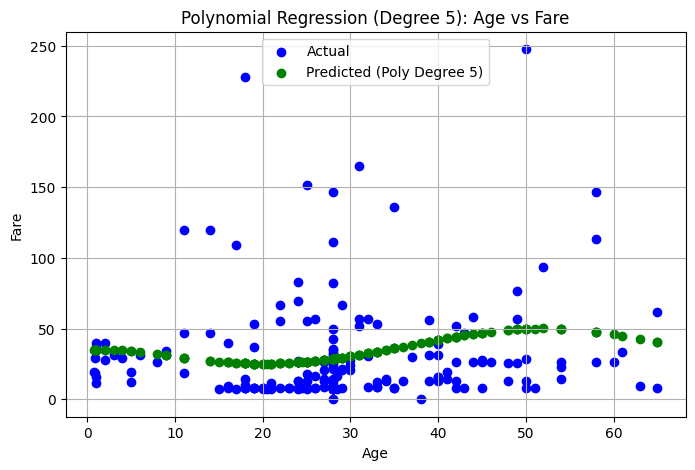

In [31]:
# Higher Degree Polynomial (5)
poly5 = PolynomialFeatures(degree=5)
X1_train_poly5 = poly5.fit_transform(X1_train)
X1_test_poly5 = poly5.transform(X1_test)

poly_model5 = LinearRegression()
poly_model5.fit(X1_train_poly5, y1_train)
y_pred_poly5 = poly_model5.predict(X1_test_poly5)

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(X1_test, y1_test, color='blue', label='Actual')
plt.scatter(X1_test, y_pred_poly5, color='green', label='Predicted (Poly Degree 5)')
plt.legend()
plt.title("Polynomial Regression (Degree 5): Age vs Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.grid(True)
plt.show()

### Reflection 5.5
1. Which model performed better and why?
   * The degree 5 model looks to have overfit the noise better than the degree 3 model, although they look very alike.
2. Why?
   * When you increase the degree of the polynomial, and with little data, the generalizations become worse.

## Section 6. Final Thoughts & Insights
Your notebook should tell a data story. Use this section to demonstrate your thinking and value as an analyst.

### 6.1 Summarize Findings
1. What features were most useful?
   * The most useful one was pclass.
2. What regression model performed best?
   * The ElasticNet did.
3. How did model complexity or regularization affect results?
   * The higher complexity of the polynomial for example led to discovering non-linear relationships, but led to overfitting. The regularized models were much more stable.

### 6.2 Discuss Challenges
1. Was fare hard to predict? Why?
   * Yes, it seems like many different factors go into the fares, and one variable wasn't enough to capture the bigger picture.
2. Did skew or outliers impact the models?
   * Yes for sure.

### 6.3 Optional Next Steps
1. Try different features besides the ones used (e.g., pclass, sex if you didn't use them this time)
2. Try predicting age instead of fare
3. Explore log transformation of fare to reduce skew